**XG boosting**

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
df=pd.read_csv(r'C:\Users\Malaika\Downloads\final_cleaning.csv')

In [4]:
df.head(5)

,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,...,IUCR_5094,IUCR_5110,IUCR_5111,IUCR_5112,IUCR_5113,IUCR_5114,IUCR_5121,IUCR_5130,IUCR_5131,IUCR_5132
0,1,1,-0.185476,-0.181792,0.083027,-0.395454,1.510226,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,-1.210577,-1.195622,-0.206959,0.211174,1.510226,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.540336,0.542373,1.025482,-0.582108,1.510226,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.551903,0.542373,0.373013,-0.582108,1.510226,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0.538890,0.542373,0.373013,-0.582108,1.510226,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* training 5000 rows

In [5]:
df_1 = df.sample(n=5000, random_state=42)

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


X = df_1.drop('Arrest', axis=1)
y = df_1['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Using binary logistic for arrest
xg_clf = XGBClassifier(objective='binary:logistic',n_estimators=100, seed=42)

#training model
xg_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [6]:
y_pred = xg_clf.predict(X_test)

In [7]:
#Scores

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')

print(f'Scores with 5000 rows: ')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')

Scores with 5000 rows: 
Accuracy: 0.8620
F1 Score: 0.8040
Precision: 0.8369
recall: 0.7830


* testing with 10000 rows

In [8]:
df_2 = df.sample(n=10000, random_state=42)

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


X = df_2.drop('Arrest', axis=1)
y = df_2['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Using binary logistic for arrest
xg_clf = XGBClassifier(objective='binary:logistic',n_estimators=100, seed=42)

#training model
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [9]:
y_pred = xg_clf.predict(X_test)

In [10]:
#Scores for 10,000 rows

accuracy_2 = accuracy_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred, average='macro')
precision_2=precision_score(y_test, y_pred, average='macro')
recall_2=recall_score(y_test, y_pred, average='macro')

print(f'Scores with 10,000 rows: ')
print(f"Accuracy: {accuracy_2:.4f}")
print(f"F1 Score: {f1_2:.4f}")
print(f'Precision: {precision_2:.4f}')
print(f'recall: {recall_2:.4f}')

Scores with 10,000 rows: 
Accuracy: 0.8835
F1 Score: 0.8364
Precision: 0.8833
recall: 0.8092


* testing all data

In [11]:


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


X = df.drop('Arrest', axis=1)
y = df['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Using binary logistic for arrest
xg_clf = XGBClassifier(objective='binary:logistic',n_estimators=100, seed=42)

#training model
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [12]:
y_pred = xg_clf.predict(X_test)

In [13]:
#Scores for all rows

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')

print(f'Scores with all rows: ')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')

# The overall scores improved but not much, from 10,000 rows to using all rows

Scores with all rows: 
Accuracy: 0.8897
F1 Score: 0.8401
Precision: 0.8988
recall: 0.8082


**Creating a Confusion matrix for the model with all rows**

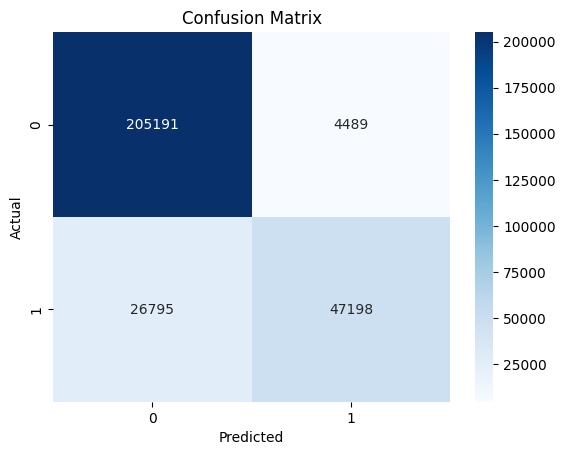

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

metric_text=(
    f'Scores with all rows:\n'
    f"Accuracy: {accuracy:.4f}\n"
    f"F1 Score: {f1:.4f}\n"
    f'Precision: {precision:.4f}\n'
    f'recall: {recall:.4f}\n'
)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Confusion metrics insights**

* True positive cases: 205191
* True Negative cases: 47198
* False negative cases: 4489
* Fasle positive cases: 26795

* The model predicts arrest pretty well, But there is still room for improvement

**tuning number of estimators**

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


X = df.drop('Arrest', axis=1)
y = df['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Using binary logistic for arrest
xg_clf = XGBClassifier(objective='binary:logistic',n_estimators=200, seed=42)

#training model
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [21]:
y_pred = xg_clf.predict(X_test)

In [23]:
accuracy_4 = accuracy_score(y_test, y_pred)
f1_4 = f1_score(y_test, y_pred, average='macro')
precision_4=precision_score(y_test, y_pred, average='macro')
recall_4=recall_score(y_test, y_pred, average='macro')

print(f'Scores with 200 n_estimators:')
print(f"Accuracy: {accuracy_4:.4f}")
print(f"F1 Score: {f1_4:.4f}")
print(f'Precision: {precision_4:.4f}')
print(f'recall: {recall_4:.4f}')

Scores with 200 n_estimators:
Accuracy: 0.8910
F1 Score: 0.8427
Precision: 0.8987
recall: 0.8116


In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


X = df.drop('Arrest', axis=1)
y = df['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Using binary logistic for arrest
xg_clf = XGBClassifier(objective='binary:logistic',n_estimators=300, seed=42)

#training model
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
y_pred = xg_clf.predict(X_test)

In [19]:
accuracy_4 = accuracy_score(y_test, y_pred)
f1_4 = f1_score(y_test, y_pred, average='macro')
precision_4=precision_score(y_test, y_pred, average='macro')
recall_4=recall_score(y_test, y_pred, average='macro')

print(f'Scores with 300 n_estimators:')
print(f"Accuracy: {accuracy_4:.4f}")
print(f"F1 Score: {f1_4:.4f}")
print(f'Precision: {precision_4:.4f}')
print(f'recall: {recall_4:.4f}')

Scores with 300 n_estimators:
Accuracy: 0.8914
F1 Score: 0.8434
Precision: 0.8984
recall: 0.8126


**Cross validation**

In [24]:
from sklearn.model_selection import cross_val_score

xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

In [27]:
f1_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_macro')
print("F1 Scores:", f1_scores)
print("Mean F1 Score:", f1_scores.mean())

precision_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='precision_macro')
print("Precision Scores:", precision_scores)
print("Mean Precision Score:", precision_scores.mean())

recall_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='recall_macro')
print("Recall Scores:", recall_scores)
print("Mean Recall Score:", recall_scores.mean())

F1 Scores: [0.84135468 0.83619713 0.83312022 0.82453755 0.79007276]
Mean F1 Score: 0.8250564678500754
Precision Scores: [0.9017385  0.90202541 0.89840039 0.89185437 0.88198038]
Mean Precision Score: 0.8951998117731861
Recall Scores: [0.80891152 0.80239082 0.7996668  0.79105731 0.7538823 ]
Mean Recall Score: 0.791181751224239


In [28]:
print("Accuracy:", cv_scores)
print("Mean Accuracy scores:", cv_scores.mean())

Accuracy: [0.88160255 0.88127647 0.88282262 0.8819942  0.88148745]
Mean Accuracy scores: 0.8818366576959245


**final thoughts**

* A low recall score suggest the model is missing some true positive cases. 
* The model performs the best in precision, so it is usually right when it presicts an arrest


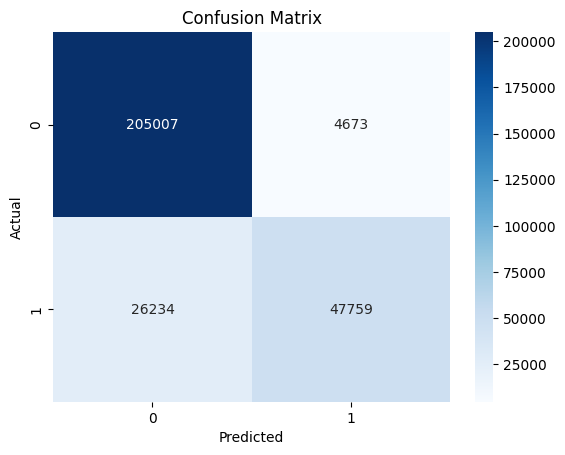

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

metric_text=(
    f'Scores with all rows:\n'
    f"Accuracy: {accuracy:.4f}\n"
    f"F1 Score: {f1:.4f}\n"
    f'Precision: {precision:.4f}\n'
    f'recall: {recall:.4f}\n'
)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Final Confusion metrics insights**

* True positive cases: 205191-->205007
* True negative cases: 47198-->47759
* False negative cases: 4489--> 4673
* Fasle positive cases: 26795-->26234